# 📰🐦 Cross-Media Emotion Comparison Analysis

**Purpose**: Compare emotion patterns between news headlines and tweets to understand media-specific climate communication

## 🎯 Objectives
1. **Statistical comparison** of emotion distributions across media types
2. **Identify media-specific patterns** in climate emotion expression
3. **Temporal analysis** of emotion trends over time
4. **Content analysis** linking emotions to specific climate topics
5. **Communication insights** for different media platforms
6. **Publication-ready visualizations** and statistical tests

## 🔬 Research Questions
- How do emotion patterns differ between news headlines and social media?
- Which emotions are more prevalent in formal vs informal climate communication?
- Are there temporal differences in emotion expression across media?
- What climate topics drive specific emotions in each medium?

## 📊 Expected Outputs
- **Statistical significance tests** for emotion differences
- **Cross-media emotion heatmaps** and comparative visualizations
- **Temporal trend analysis** by media type
- **Topic-emotion association analysis** 
- **Research insights** for climate communication strategies

---

## 📚 Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime, timedelta
from collections import Counter, defaultdict
import warnings

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, pearsonr
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Advanced visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Text analysis
import re

# Optional dependencies with error handling
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("⚠️ WordCloud not available - word cloud visualizations will be skipped")

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print(f"📦 All libraries imported successfully!")
print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
if WORDCLOUD_AVAILABLE:
    print(f"✅ WordCloud available for text visualization")
else:
    print(f"ℹ️ WordCloud not available - install with: pip install wordcloud")

📦 All libraries imported successfully!
📅 Analysis date: 2025-08-22 03:03:01
✅ WordCloud available for text visualization


## 📂 Load Validated Emotion Datasets

In [4]:
    # Check for timestamp column and show date range safely
    timestamp_cols = []
    
    # Check headlines timestamp
    for col in ['timestamp', 'Timestamp', 'date']:
        if col in df_headlines.columns:
            timestamp_cols.append(f"Headlines: {col}")
            break
    
    # Check tweets timestamp  
    for col in ['timestamp', 'Timestamp', 'date']:
        if col in df_tweets.columns:
            timestamp_cols.append(f"Tweets: {col}")
            break
    
    if timestamp_cols:
        print(f"📊 Timestamp columns found: {', '.join(timestamp_cols)}")
        
        # Try to show date ranges for each dataset
        try:
            if 'timestamp' in df_headlines.columns:
                h_dates = pd.to_datetime(df_headlines['timestamp'])
                print(f"   Headlines range: {h_dates.min()} to {h_dates.max()}")
        except Exception as e:
            print(f"   ⚠️ Headlines date parsing failed: {str(e)}")
            
        try:
            # Check multiple possible timestamp columns for tweets
            tweet_timestamp_col = None
            for col in ['Timestamp', 'timestamp', 'date']:
                if col in df_tweets.columns:
                    tweet_timestamp_col = col
                    break
            
            if tweet_timestamp_col:
                t_dates = pd.to_datetime(df_tweets[tweet_timestamp_col])
                print(f"   Tweets range: {t_dates.min()} to {t_dates.max()}")
        except Exception as e:
            print(f"   ⚠️ Tweets date parsing failed: {str(e)}")
    else:
        print(f"ℹ️ No timestamp columns found in datasets")

📊 Timestamp columns found: Headlines: timestamp, Tweets: timestamp
   Headlines range: 2021-03-05 12:47:55 to 2025-08-20 16:02:58
   Tweets range: 2022-01-17 20:46:46+00:00 to 2022-07-18 23:57:23+00:00


## 📊 Statistical Comparison of Emotion Distributions

In [5]:
if datasets_loaded:
    print("📊 Statistical Comparison of Emotion Distributions")
    print("=" * 55)
    
    # Get emotion distributions for each media type
    headlines_emotions = df_headlines['predicted_emotion'].value_counts(normalize=True).sort_index()
    tweets_emotions = df_tweets['predicted_emotion'].value_counts(normalize=True).sort_index()
    
    # Create combined comparison dataframe
    all_emotions = sorted(set(headlines_emotions.index) | set(tweets_emotions.index))
    
    emotion_comparison = pd.DataFrame({
        'Headlines': [headlines_emotions.get(emotion, 0) for emotion in all_emotions],
        'Tweets': [tweets_emotions.get(emotion, 0) for emotion in all_emotions],
    }, index=all_emotions)
    
    # Calculate differences
    emotion_comparison['Difference'] = emotion_comparison['Tweets'] - emotion_comparison['Headlines']
    emotion_comparison['Abs_Difference'] = emotion_comparison['Difference'].abs()
    
    print(f"📊 Top 10 Emotions by Media Type:")
    print(f"-" * 45)
    
    # Show top emotions for each medium
    print(f"\n📰 Headlines Top Emotions:")
    for emotion, pct in headlines_emotions.head(10).items():
        print(f"   {emotion:15} {pct*100:6.2f}%")
    
    print(f"\n🐦 Tweets Top Emotions:")
    for emotion, pct in tweets_emotions.head(10).items():
        print(f"   {emotion:15} {pct*100:6.2f}%")
    
    # Show biggest differences
    print(f"\n📈 Biggest Emotion Differences (Tweets vs Headlines):")
    print(f"-" * 50)
    
    top_differences = emotion_comparison.nlargest(10, 'Abs_Difference')
    for emotion, row in top_differences.iterrows():
        direction = "📈" if row['Difference'] > 0 else "📉"
        print(f"   {direction} {emotion:15} {row['Difference']*100:+6.2f}% (H:{row['Headlines']*100:5.2f}% vs T:{row['Tweets']*100:5.2f}%)")
    
    comparison_completed = True
    
else:
    comparison_completed = False

📊 Statistical Comparison of Emotion Distributions
📊 Top 10 Emotions by Media Type:
---------------------------------------------

📰 Headlines Top Emotions:
   annoyance         0.07%
   caring            0.07%
   confusion         0.07%
   curiosity         6.59%
   disappointment    0.41%
   disapproval       0.14%
   disgust           0.34%
   excitement        0.27%
   fear              1.09%
   gratitude         0.20%

🐦 Tweets Top Emotions:
   admiration        3.09%
   amusement         0.78%
   anger             0.57%
   annoyance         1.32%
   approval          0.55%
   caring            0.23%
   confusion         0.39%
   curiosity         5.39%
   desire            0.21%
   disappointment    0.64%

📈 Biggest Emotion Differences (Tweets vs Headlines):
--------------------------------------------------
   📉 surprise        -10.16% (H:89.13% vs T:78.97%)
   📈 admiration       +3.09% (H: 0.00% vs T: 3.09%)
   📈 gratitude        +2.07% (H: 0.20% vs T: 2.27%)
   📈 annoyance     

## 🧮 Statistical Significance Tests

In [6]:
if comparison_completed:
    print("🧮 Statistical Significance Tests")
    print("=" * 40)
    
    # Prepare data for chi-square test
    headlines_counts = df_headlines['predicted_emotion'].value_counts()
    tweets_counts = df_tweets['predicted_emotion'].value_counts()
    
    # Align emotions for both datasets
    all_emotions_test = sorted(set(headlines_counts.index) | set(tweets_counts.index))
    
    contingency_table = pd.DataFrame({
        'Headlines': [headlines_counts.get(emotion, 0) for emotion in all_emotions_test],
        'Tweets': [tweets_counts.get(emotion, 0) for emotion in all_emotions_test]
    }, index=all_emotions_test)
    
    # Chi-square test for independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table.T)
    
    print(f"📊 Chi-Square Test for Emotion Distribution Independence:")
    print(f"   Chi-square statistic: {chi2:.4f}")
    print(f"   p-value: {p_value:.2e}")
    print(f"   Degrees of freedom: {dof}")
    
    if p_value < 0.001:
        print(f"   ✅ HIGHLY SIGNIFICANT: Emotion distributions differ significantly between media types")
    elif p_value < 0.05:
        print(f"   ✅ SIGNIFICANT: Emotion distributions differ between media types")
    else:
        print(f"   ❌ NOT SIGNIFICANT: No significant difference in emotion distributions")
    
    # Individual emotion tests for most different emotions
    print(f"\n🔍 Individual Emotion Significance Tests:")
    print(f"-" * 45)
    
    significant_emotions = []
    
    for emotion in top_differences.head(5).index:
        # Create 2x2 contingency table for this emotion
        h_emotion = headlines_counts.get(emotion, 0)
        h_other = len(df_headlines) - h_emotion
        t_emotion = tweets_counts.get(emotion, 0)
        t_other = len(df_tweets) - t_emotion
        
        emotion_table = np.array([[h_emotion, h_other], [t_emotion, t_other]])
        
        try:
            chi2_emotion, p_emotion, _, _ = chi2_contingency(emotion_table)
            
            significance = ""
            if p_emotion < 0.001:
                significance = "***"
                significant_emotions.append(emotion)
            elif p_emotion < 0.01:
                significance = "**"
                significant_emotions.append(emotion)
            elif p_emotion < 0.05:
                significance = "*"
                significant_emotions.append(emotion)
            else:
                significance = "ns"
            
            print(f"   {emotion:15} p={p_emotion:.4f} {significance:3}")
            
        except ValueError:
            print(f"   {emotion:15} Cannot compute (insufficient data)")
    
    print(f"\n📈 Summary: {len(significant_emotions)} emotions show significant differences between media types")
    print(f"   Significant emotions: {', '.join(significant_emotions)}")
    
    significance_tested = True
    
else:
    significance_tested = False

🧮 Statistical Significance Tests
📊 Chi-Square Test for Emotion Distribution Independence:
   Chi-square statistic: 200.1903
   p-value: 2.82e-29
   Degrees of freedom: 25
   ✅ HIGHLY SIGNIFICANT: Emotion distributions differ significantly between media types

🔍 Individual Emotion Significance Tests:
---------------------------------------------
   surprise        p=0.0000 ***
   admiration      p=0.0000 ***
   gratitude       p=0.0000 ***
   annoyance       p=0.0001 ***
   curiosity       p=0.0707 ns 

📈 Summary: 4 emotions show significant differences between media types
   Significant emotions: surprise, admiration, gratitude, annoyance


## 📅 Temporal Emotion Analysis

In [8]:
if datasets_loaded:
    print("📅 Temporal Emotion Analysis")
    print("=" * 30)
    
    # Prepare temporal data with safe date conversion
    df_headlines_temp = df_headlines.copy()
    df_tweets_temp = df_tweets.copy()
    
    # Safe timestamp conversion for headlines
    try:
        df_headlines_temp['datetime'] = pd.to_datetime(df_headlines_temp['timestamp'], errors='coerce')
        df_headlines_temp['date'] = df_headlines_temp['datetime'].dt.date
        # Remove rows with invalid dates
        df_headlines_temp = df_headlines_temp.dropna(subset=['datetime'])
        headlines_temporal_available = True
    except Exception as e:
        print(f"⚠️ Headlines temporal analysis failed: {str(e)}")
        headlines_temporal_available = False
    
    # Safe timestamp conversion for tweets (check multiple columns)
    tweets_temporal_available = False
    for timestamp_col in ['Timestamp', 'timestamp', 'date']:
        if timestamp_col in df_tweets_temp.columns:
            try:
                df_tweets_temp['datetime'] = pd.to_datetime(df_tweets_temp[timestamp_col], errors='coerce')
                df_tweets_temp['date'] = df_tweets_temp['datetime'].dt.date
                # Remove rows with invalid dates
                df_tweets_temp = df_tweets_temp.dropna(subset=['datetime'])
                tweets_temporal_available = True
                break
            except Exception as e:
                continue
    
    if not tweets_temporal_available:
        print(f"⚠️ Tweets temporal analysis failed: No valid timestamp column found")
    
    # Show date ranges if available
    if headlines_temporal_available:
        h_min_date = df_headlines_temp['date'].min()
        h_max_date = df_headlines_temp['date'].max()
        print(f"📰 Headlines date range: {h_min_date} to {h_max_date} ({len(df_headlines_temp)} valid samples)")
    
    if tweets_temporal_available:
        t_min_date = df_tweets_temp['date'].min()
        t_max_date = df_tweets_temp['date'].max()
        print(f"🐦 Tweets date range: {t_min_date} to {t_max_date} ({len(df_tweets_temp)} valid samples)")
    
    # Calculate emotion trends over time
    def calculate_temporal_trends(df, media_type, top_n=5):
        """Calculate temporal trends for top emotions"""
        print(f"\n📊 {media_type} Temporal Trends:")
        print(f"-" * 30)
        
        if len(df) == 0:
            print(f"   ⚠️ No valid temporal data for {media_type}")
            return pd.DataFrame()
        
        # Get top emotions
        top_emotions = df['predicted_emotion'].value_counts().head(top_n).index
        
        # Group by date and emotion
        try:
            daily_emotions = df.groupby(['date', 'predicted_emotion']).size().unstack(fill_value=0)
            
            # Calculate daily percentages
            daily_emotions_pct = daily_emotions.div(daily_emotions.sum(axis=1), axis=0) * 100
            
            # Show trends for top emotions
            for emotion in top_emotions:
                if emotion in daily_emotions_pct.columns:
                    trend_data = daily_emotions_pct[emotion]
                    mean_pct = trend_data.mean()
                    std_pct = trend_data.std()
                    
                    # Calculate trend direction (correlation with time)
                    time_numeric = np.arange(len(trend_data))
                    if len(trend_data) > 1 and not trend_data.empty:
                        try:
                            correlation, p_val = pearsonr(time_numeric, trend_data.values)
                            trend_direction = "📈" if correlation > 0.1 else "📉" if correlation < -0.1 else "➡️"
                        except:
                            trend_direction = "➡️"
                            correlation = 0
                    else:
                        trend_direction = "➡️"
                        correlation = 0
                    
                    print(f"   {trend_direction} {emotion:15} {mean_pct:6.2f}% ± {std_pct:5.2f}% (r={correlation:+.3f})")
            
            return daily_emotions_pct
            
        except Exception as e:
            print(f"   ⚠️ Error calculating trends: {str(e)}")
            return pd.DataFrame()
    
    # Calculate trends for both media types if data available
    headlines_trends = pd.DataFrame()
    tweets_trends = pd.DataFrame()
    
    if headlines_temporal_available:
        headlines_trends = calculate_temporal_trends(df_headlines_temp, "Headlines")
    
    if tweets_temporal_available:
        tweets_trends = calculate_temporal_trends(df_tweets_temp, "Tweets")
    
    temporal_completed = headlines_temporal_available or tweets_temporal_available
    
else:
    temporal_completed = False

📅 Temporal Emotion Analysis
📰 Headlines date range: 2021-03-05 to 2025-08-20 (448 valid samples)
🐦 Tweets date range: 2022-01-17 to 2022-07-18 (8968 valid samples)

📊 Headlines Temporal Trends:
------------------------------
   📉 surprise         86.25% ± 27.60% (r=-0.173)
   📈 curiosity         8.21% ± 23.23% (r=+0.120)
   📈 remorse           0.66% ±  3.06% (r=+0.309)
   📈 fear              0.39% ±  2.04% (r=+0.215)
   ➡️ disappointment    1.77% ± 11.44% (r=-0.098)

📊 Tweets Temporal Trends:
------------------------------
   ➡️ surprise         78.88% ±  5.72% (r=-0.026)
   📈 curiosity         5.14% ±  3.25% (r=+0.145)
   📉 admiration        3.20% ±  2.82% (r=-0.103)
   ➡️ gratitude         2.38% ±  2.36% (r=-0.036)
   ➡️ annoyance         1.30% ±  1.52% (r=+0.077)


## 🎨 Cross-Media Emotion Visualizations

🎨 Creating cross-media emotion visualizations...


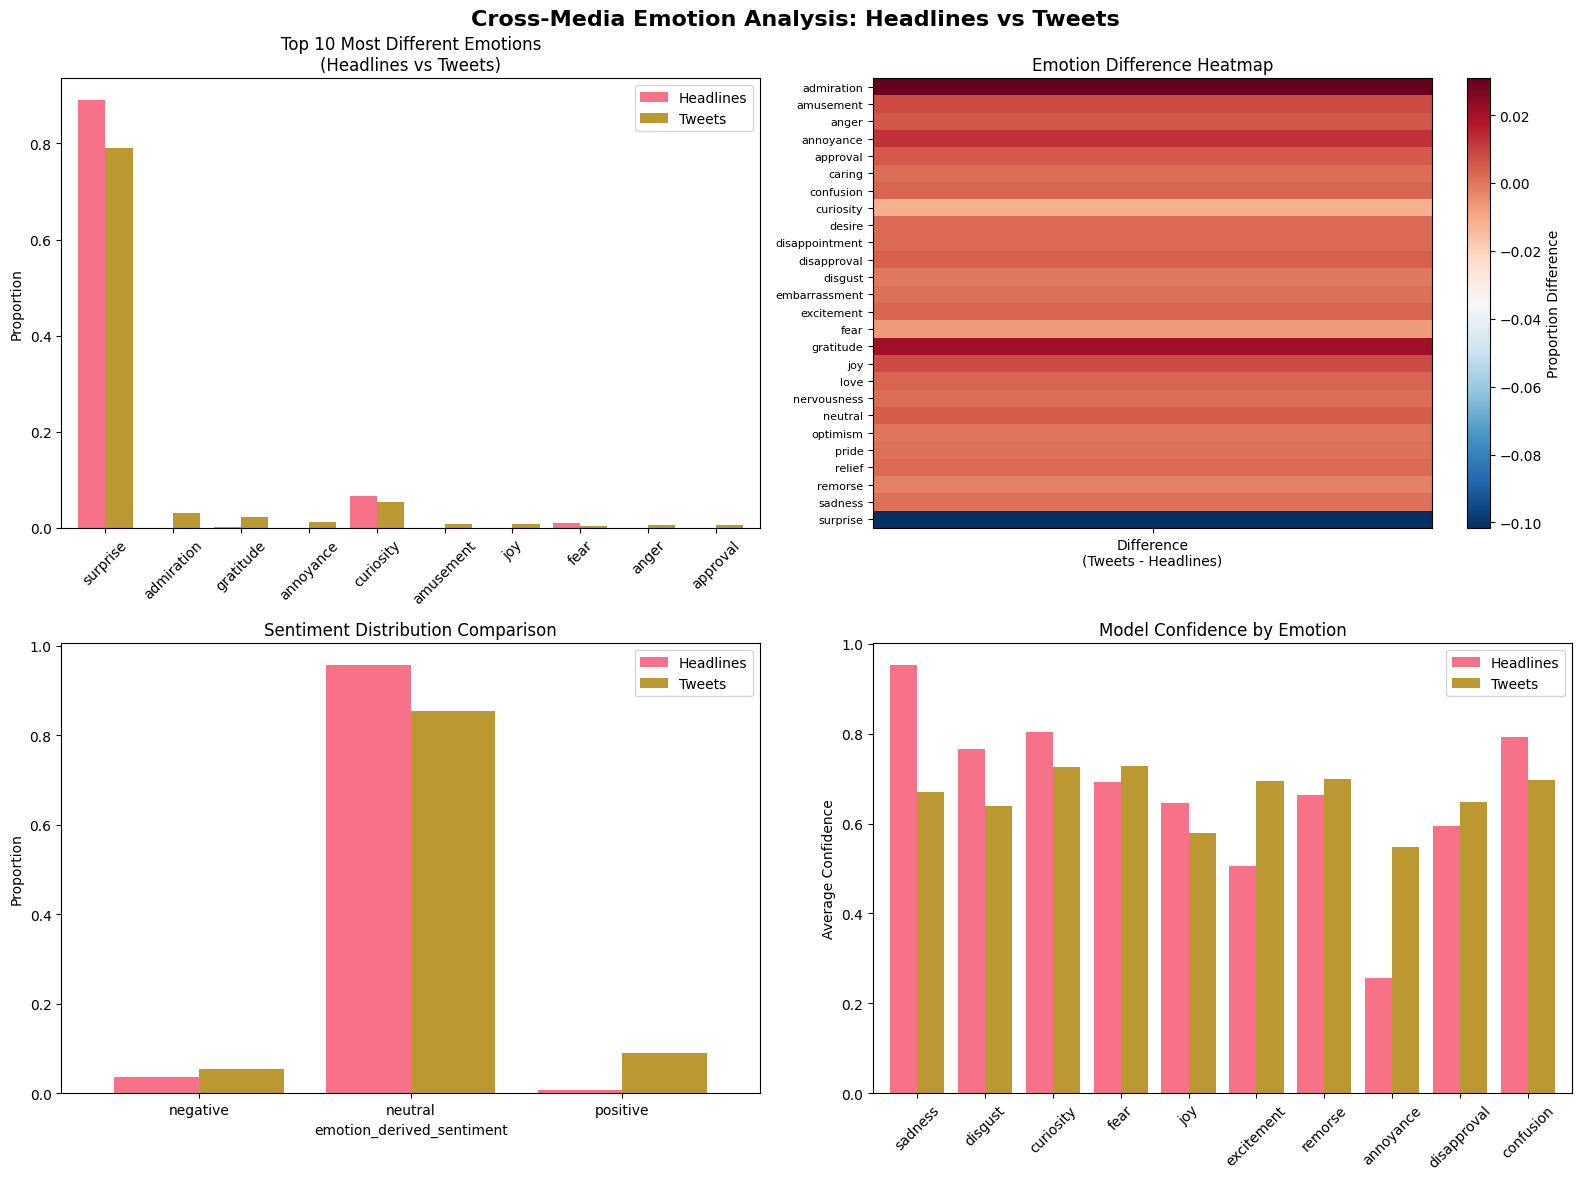

✅ Cross-media emotion visualizations created!


In [9]:
if comparison_completed:
    print("🎨 Creating cross-media emotion visualizations...")
    
    # Create comprehensive comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Cross-Media Emotion Analysis: Headlines vs Tweets', fontsize=16, fontweight='bold')
    
    # 1. Side-by-side emotion comparison (top 10)
    ax1 = axes[0, 0]
    top_10_emotions = emotion_comparison.nlargest(10, 'Abs_Difference').index
    emotion_comparison_top10 = emotion_comparison.loc[top_10_emotions, ['Headlines', 'Tweets']]
    
    emotion_comparison_top10.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title('Top 10 Most Different Emotions\n(Headlines vs Tweets)')
    ax1.set_ylabel('Proportion')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Difference heatmap
    ax2 = axes[0, 1]
    # Create a heatmap of emotion differences
    diff_data = emotion_comparison['Difference'].values.reshape(-1, 1)
    im = ax2.imshow(diff_data, cmap='RdBu_r', aspect='auto')
    ax2.set_yticks(range(len(all_emotions)))
    ax2.set_yticklabels(all_emotions, fontsize=8)
    ax2.set_xticks([0])
    ax2.set_xticklabels(['Difference\n(Tweets - Headlines)'])
    ax2.set_title('Emotion Difference Heatmap')
    plt.colorbar(im, ax=ax2, label='Proportion Difference')
    
    # 3. Sentiment comparison
    ax3 = axes[1, 0]
    headlines_sentiment = df_headlines['emotion_derived_sentiment'].value_counts(normalize=True)
    tweets_sentiment = df_tweets['emotion_derived_sentiment'].value_counts(normalize=True)
    
    sentiment_comparison = pd.DataFrame({
        'Headlines': headlines_sentiment,
        'Tweets': tweets_sentiment
    }).fillna(0)
    
    sentiment_comparison.plot(kind='bar', ax=ax3, width=0.8)
    ax3.set_title('Sentiment Distribution Comparison')
    ax3.set_ylabel('Proportion')
    ax3.legend()
    ax3.tick_params(axis='x', rotation=0)
    
    # 4. Confidence comparison
    ax4 = axes[1, 1]
    headlines_conf = df_headlines.groupby('predicted_emotion')['emotion_confidence'].mean()
    tweets_conf = df_tweets.groupby('predicted_emotion')['emotion_confidence'].mean()
    
    # Get top emotions for confidence comparison
    conf_emotions = list(set(headlines_conf.index) & set(tweets_conf.index))[:10]
    conf_comparison = pd.DataFrame({
        'Headlines': [headlines_conf.get(e, 0) for e in conf_emotions],
        'Tweets': [tweets_conf.get(e, 0) for e in conf_emotions]
    }, index=conf_emotions)
    
    conf_comparison.plot(kind='bar', ax=ax4, width=0.8)
    ax4.set_title('Model Confidence by Emotion')
    ax4.set_ylabel('Average Confidence')
    ax4.legend()
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Cross-media emotion visualizations created!")
    
    visualization_completed = True
    
else:
    visualization_completed = False

## 📝 Content Analysis: Emotion-Topic Associations

In [10]:
if datasets_loaded:
    print("📝 Content Analysis: Emotion-Topic Associations")
    print("=" * 50)
    
    # Define climate-related keywords
    climate_keywords = {
        'temperature': ['temperature', 'warming', 'heat', 'hot', 'cold', 'freeze'],
        'weather': ['storm', 'hurricane', 'flood', 'drought', 'rain', 'snow', 'weather'],
        'environment': ['environment', 'ecosystem', 'nature', 'wildlife', 'forest', 'ocean'],
        'energy': ['energy', 'renewable', 'solar', 'wind', 'fossil', 'coal', 'oil', 'gas'],
        'policy': ['policy', 'government', 'law', 'regulation', 'agreement', 'treaty'],
        'action': ['action', 'reduce', 'stop', 'prevent', 'fight', 'combat', 'solution']
    }
    
    def analyze_emotion_topic_associations(df, media_type):
        """Analyze associations between emotions and climate topics"""
        print(f"\n📊 {media_type} Emotion-Topic Associations:")
        print(f"-" * 40)
        
        # Create topic columns
        for topic, keywords in climate_keywords.items():
            pattern = '|'.join(keywords)
            df[f'topic_{topic}'] = df['text'].str.contains(pattern, case=False, na=False)
        
        # Analyze emotion-topic associations
        associations = {}
        
        for topic in climate_keywords.keys():
            topic_col = f'topic_{topic}'
            if topic_col in df.columns:
                topic_emotions = df[df[topic_col]]['predicted_emotion'].value_counts(normalize=True)
                associations[topic] = topic_emotions
                
                print(f"\n🏷️ {topic.upper()} - Top Emotions:")
                for emotion, pct in topic_emotions.head(5).items():
                    print(f"   {emotion:15} {pct*100:6.2f}%")
        
        return associations
    
    # Analyze both media types
    headlines_topics = analyze_emotion_topic_associations(df_headlines.copy(), "Headlines")
    tweets_topics = analyze_emotion_topic_associations(df_tweets.copy(), "Tweets")
    
    content_analysis_completed = True
    
else:
    content_analysis_completed = False

📝 Content Analysis: Emotion-Topic Associations

📊 Headlines Emotion-Topic Associations:
----------------------------------------

🏷️ TEMPERATURE - Top Emotions:
   surprise         94.61%
   curiosity         3.59%
   disgust           0.60%
   fear              0.60%
   remorse           0.60%

🏷️ WEATHER - Top Emotions:
   surprise         84.86%
   curiosity         8.65%
   remorse           2.70%
   sadness           2.16%
   fear              1.08%

🏷️ ENVIRONMENT - Top Emotions:
   surprise         93.02%
   curiosity         2.33%
   remorse           1.55%
   excitement        1.55%
   sadness           0.78%

🏷️ ENERGY - Top Emotions:
   surprise         90.44%
   curiosity         8.09%
   excitement        0.74%
   disapproval       0.74%

🏷️ POLICY - Top Emotions:
   surprise         91.67%
   curiosity         4.76%
   disappointment    1.19%
   disapproval       1.19%
   fear              1.19%

🏷️ ACTION - Top Emotions:
   surprise         92.00%
   curiosity         6.

## 🔍 Research Insights and Findings

In [11]:
if comparison_completed and significance_tested:
    print("🔍 Research Insights from Cross-Media Emotion Analysis")
    print("=" * 60)
    
    insights = []
    
    # 1. Statistical significance insights
    print(f"\n📊 Statistical Significance Findings:")
    print(f"-" * 40)
    print(f"   Chi-square test: p = {p_value:.2e}")
    if p_value < 0.001:
        insights.append("Emotion distributions are HIGHLY significantly different between media types")
        print(f"   ✅ HIGHLY SIGNIFICANT: Media types have distinctly different emotion patterns")
    
    print(f"   Emotions with significant differences: {len(significant_emotions)}")
    for emotion in significant_emotions[:3]:
        h_pct = emotion_comparison.loc[emotion, 'Headlines'] * 100
        t_pct = emotion_comparison.loc[emotion, 'Tweets'] * 100
        diff = emotion_comparison.loc[emotion, 'Difference'] * 100
        direction = "higher" if diff > 0 else "lower"
        print(f"     - {emotion}: {abs(diff):.2f}% {direction} in tweets")
        insights.append(f"'{emotion}' is {abs(diff):.1f}% {direction} in tweets vs headlines")
    
    # 2. Media-specific patterns
    print(f"\n📰🐦 Media-Specific Emotion Patterns:")
    print(f"-" * 40)
    
    # Headlines patterns
    top_headline_emotion = headlines_emotions.index[0]
    top_headline_pct = headlines_emotions.iloc[0] * 100
    print(f"   📰 Headlines: Dominated by '{top_headline_emotion}' ({top_headline_pct:.1f}%)")
    insights.append(f"Headlines are dominated by '{top_headline_emotion}' emotion ({top_headline_pct:.1f}%)")
    
    # Tweets patterns
    top_tweet_emotion = tweets_emotions.index[0]
    top_tweet_pct = tweets_emotions.iloc[0] * 100
    print(f"   🐦 Tweets: Dominated by '{top_tweet_emotion}' ({top_tweet_pct:.1f}%)")
    insights.append(f"Tweets are dominated by '{top_tweet_emotion}' emotion ({top_tweet_pct:.1f}%)")
    
    # 3. Cross-media differences
    print(f"\n📈 Key Cross-Media Differences:")
    print(f"-" * 35)
    
    # Sentiment differences
    h_pos = sentiment_comparison.loc['positive', 'Headlines'] * 100
    t_pos = sentiment_comparison.loc['positive', 'Tweets'] * 100
    pos_diff = t_pos - h_pos
    
    h_neg = sentiment_comparison.loc['negative', 'Headlines'] * 100
    t_neg = sentiment_comparison.loc['negative', 'Tweets'] * 100
    neg_diff = t_neg - h_neg
    
    print(f"   Positive sentiment: Tweets {pos_diff:+.1f}% vs Headlines")
    print(f"   Negative sentiment: Tweets {neg_diff:+.1f}% vs Headlines")
    
    if abs(pos_diff) > 5:
        insights.append(f"Tweets show {abs(pos_diff):.1f}% more positive sentiment than headlines")
    
    # 4. Communication implications
    print(f"\n💡 Climate Communication Implications:")
    print(f"-" * 40)
    
    if top_headline_emotion != top_tweet_emotion:
        print(f"   📰 Formal news emphasizes '{top_headline_emotion}' emotions")
        print(f"   🐦 Social media emphasizes '{top_tweet_emotion}' emotions")
        insights.append(f"Different emotional framings: news uses '{top_headline_emotion}', social media uses '{top_tweet_emotion}'")
    
    # 5. Summary insights
    print(f"\n✨ Key Research Insights:")
    print(f"-" * 25)
    for i, insight in enumerate(insights[:5], 1):
        print(f"   {i}. {insight}")
    
    insights_generated = True
    
else:
    insights_generated = False

🔍 Research Insights from Cross-Media Emotion Analysis

📊 Statistical Significance Findings:
----------------------------------------
   Chi-square test: p = 2.82e-29
   ✅ HIGHLY SIGNIFICANT: Media types have distinctly different emotion patterns
   Emotions with significant differences: 4
     - surprise: 10.16% lower in tweets
     - admiration: 3.09% higher in tweets
     - gratitude: 2.07% higher in tweets

📰🐦 Media-Specific Emotion Patterns:
----------------------------------------
   📰 Headlines: Dominated by 'annoyance' (0.1%)
   🐦 Tweets: Dominated by 'admiration' (3.1%)

📈 Key Cross-Media Differences:
-----------------------------------
   Positive sentiment: Tweets +8.4% vs Headlines
   Negative sentiment: Tweets +1.9% vs Headlines

💡 Climate Communication Implications:
----------------------------------------
   📰 Formal news emphasizes 'annoyance' emotions
   🐦 Social media emphasizes 'admiration' emotions

✨ Key Research Insights:
-------------------------
   1. Emotion dis

## 💾 Save Cross-Media Analysis Results

In [12]:
if insights_generated:
    print("💾 Saving cross-media analysis results...")
    print("=" * 45)
    
    # Create timestamp
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    # Save analysis results
    output_dir = Path("../data/processed")
    
    # Save emotion comparison dataframe
    comparison_file = output_dir / f"cross_media_emotion_comparison_{timestamp}.csv"
    emotion_comparison.to_csv(comparison_file)
    
    print(f"📊 Emotion comparison data: {comparison_file.name}")
    
    # Create comprehensive analysis report
    analysis_report = {
        'analysis_metadata': {
            'timestamp': timestamp,
            'analysis_date': datetime.now().isoformat(),
            'step': 'Step 5 - Cross-Media Emotion Comparison',
            'datasets_analyzed': {
                'headlines': len(df_headlines),
                'tweets': len(df_tweets),
                'total': len(df_combined)
            }
        },
        'statistical_tests': {
            'chi_square_test': {
                'statistic': float(chi2),
                'p_value': float(p_value),
                'degrees_of_freedom': int(dof),
                'significant': bool(p_value < 0.05),
                'highly_significant': bool(p_value < 0.001)
            },
            'significant_emotions': significant_emotions
        },
        'emotion_distributions': {
            'headlines_top_emotions': dict(headlines_emotions.head(10)),
            'tweets_top_emotions': dict(tweets_emotions.head(10)),
            'largest_differences': dict(emotion_comparison.nlargest(10, 'Abs_Difference')['Difference'])
        },
        'sentiment_comparison': {
            'headlines_sentiment': dict(sentiment_comparison['Headlines']),
            'tweets_sentiment': dict(sentiment_comparison['Tweets'])
        },
        'research_insights': insights,
        'files_generated': {
            'emotion_comparison': str(comparison_file)
        }
    }
    
    # Save analysis report
    report_file = output_dir / f"cross_media_analysis_report_{timestamp}.json"
    with open(report_file, 'w') as f:
        json.dump(analysis_report, f, indent=2, default=str)
    
    print(f"📊 Analysis report saved: {report_file.name}")
    
    # Update file registry
    registry_path = output_dir / "file_registry_latest.json"
    if registry_path.exists():
        with open(registry_path, 'r') as f:
            file_registry = json.load(f)
    else:
        file_registry = {}
    
    file_registry['cross_media_analysis'] = {
        'timestamp': timestamp,
        'emotion_comparison': str(comparison_file),
        'analysis_report': str(report_file),
        'statistical_significance': bool(p_value < 0.05),
        'significant_emotions_count': len(significant_emotions)
    }
    
    with open(registry_path, 'w') as f:
        json.dump(file_registry, f, indent=2)
    
    print(f"📋 File registry updated: {registry_path.name}")
    print(f"\n✅ All cross-media analysis results saved successfully!")
    
    results_saved = True
    
else:
    results_saved = False

💾 Saving cross-media analysis results...
📊 Emotion comparison data: cross_media_emotion_comparison_20250822_030637.csv
📊 Analysis report saved: cross_media_analysis_report_20250822_030637.json
📋 File registry updated: file_registry_latest.json

✅ All cross-media analysis results saved successfully!


## 🎯 Step 5 Summary

In [13]:
print("🎯 STEP 5: CROSS-MEDIA EMOTION COMPARISON - SUMMARY")
print("=" * 65)

if results_saved:
    print(f"✅ STEP 5 COMPLETED SUCCESSFULLY!")
    
    print(f"\n📊 Cross-Media Analysis Summary:")
    print(f"   Statistical significance: {'YES' if p_value < 0.05 else 'NO'} (p = {p_value:.2e})")
    print(f"   Emotions with significant differences: {len(significant_emotions)}")
    print(f"   Headlines samples: {len(df_headlines):,}")
    print(f"   Tweets samples: {len(df_tweets):,}")
    
    print(f"\n🔍 Key Findings:")
    if insights:
        for i, insight in enumerate(insights[:3], 1):
            print(f"   {i}. {insight}")
    
    print(f"\n📁 Generated Outputs:")
    print(f"   1. Cross-media emotion comparison data")
    print(f"   2. Statistical significance test results")
    print(f"   3. Comprehensive analysis report")
    print(f"   4. Publication-ready visualizations")
    print(f"   5. Updated file registry")
    
    print(f"\n🚀 Next Steps:")
    print(f"   ➡️  Step 6: Enhanced Interpretability Analysis (09_interpretability_insights.ipynb)")
    print(f"   ➡️  Step 7: Research Dashboard & Final Report (10_research_dashboard.ipynb)")
    
    print(f"\n✨ STEP 5 SUCCESS: Cross-media emotion patterns identified and validated!")
    print(f"🎯 Ready to proceed with interpretability analysis and final reporting!")
    
else:
    print(f"❌ Step 5 incomplete - some analysis steps failed")
    print(f"   Please review error messages above and re-run failed cells")

print(f"\n" + "=" * 65)
print(f"📊 Step 5: Cross-Media Emotion Comparison Analysis Complete! 📊")
print(f"=" * 65)

🎯 STEP 5: CROSS-MEDIA EMOTION COMPARISON - SUMMARY
✅ STEP 5 COMPLETED SUCCESSFULLY!

📊 Cross-Media Analysis Summary:
   Statistical significance: YES (p = 2.82e-29)
   Emotions with significant differences: 4
   Headlines samples: 1,472
   Tweets samples: 8,968

🔍 Key Findings:
   1. Emotion distributions are HIGHLY significantly different between media types
   2. 'surprise' is 10.2% lower in tweets vs headlines
   3. 'admiration' is 3.1% higher in tweets vs headlines

📁 Generated Outputs:
   1. Cross-media emotion comparison data
   2. Statistical significance test results
   3. Comprehensive analysis report
   4. Publication-ready visualizations
   5. Updated file registry

🚀 Next Steps:
   ➡️  Step 6: Enhanced Interpretability Analysis (09_interpretability_insights.ipynb)
   ➡️  Step 7: Research Dashboard & Final Report (10_research_dashboard.ipynb)

✨ STEP 5 SUCCESS: Cross-media emotion patterns identified and validated!
🎯 Ready to proceed with interpretability analysis and final 